In [100]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

### Helper functions

In [101]:
def print_balance(df):
    fraud = df[df["Class"] == 1].size
    legit = df[df["Class"] == 0].size

    print "Number of fraud transactions: {}".format(fraud)
    print "Number of legitimate transactions: {}".format(legit)
    print "Ration of fraud/legitimate transactions = {}".format(float(fraud)/float(legit))
    plt.figure(figsize=(10,8))
    sns.set(style="darkgrid")
    sns.countplot(data=df, x="Class")
    
    
def train_and_print_RF(df, max_d=2, n_est=20):
    X, y = df.loc[:, "V1":"V28"], df["Class"]

    X_train, X_test, y_train, y_test = (
        train_test_split(X, y, test_size=0.33, random_state=42))

    clf = RandomForestClassifier(max_depth=max_d, n_estimators=n_est)

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)

    print classification_report(y_test, predictions)

## Loading and exploring the dataset

In [102]:
df = pd.read_csv("creditcard.csv")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Normalizing data

In [104]:
new_df = df.loc[:,"V1":"Amount"]
fraud_class = df["Class"]
min_max_scaler = preprocessing.MinMaxScaler()
index, cols = new_df.index, new_df.columns
x_scaled = min_max_scaler.fit_transform(new_df)
norm_df = pd.DataFrame(x_scaled, columns=cols)
norm_df["Class"] = fraud_class
norm_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


## Random Forest Classifier for the initial dataset

In [105]:
train_and_print_RF(df)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93838
          1       0.86      0.58      0.70       149

avg / total       1.00      1.00      1.00     93987



## Exploring imbalanced classes

Number of fraud transactions: 14760
Number of legitimate transactions: 8529450
Ration of fraud/legitimate transactions = 0.00173047500132


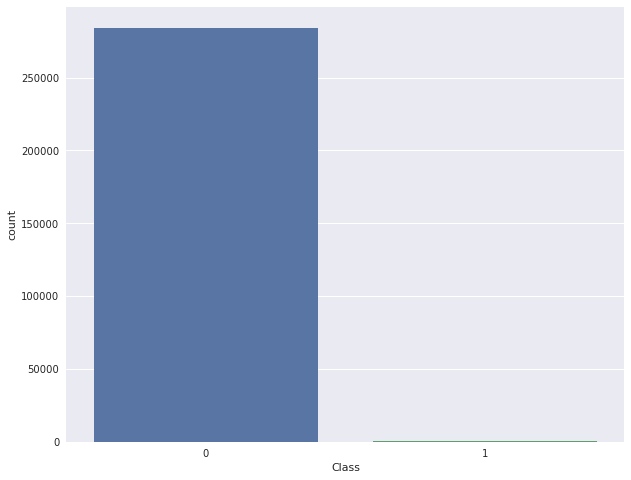

In [106]:
print_balance(norm_df)

Conclusion: It's apparent that the dataset is highly imbalanced and this is the reason we get a quite high precision in our predictions while the recall is still not good enough. Let's try to see if this can be improved by oversampling the fraud (minor) class, or undersampling the legit (major) class.

## Undersampling

In [107]:
under_sampling_fraud = norm_df[norm_df["Class"] == 1]
under_size = under_sampling_fraud.size
under_sampling_legit = (norm_df[norm_df["Class"] == 0]).sample(n=under_size/25)
df_under = pd.concat([under_sampling_legit, under_sampling_fraud])

Number of fraud transactions: 14760
Number of legitimate transactions: 17700
Ration of fraud/legitimate transactions = 0.833898305085


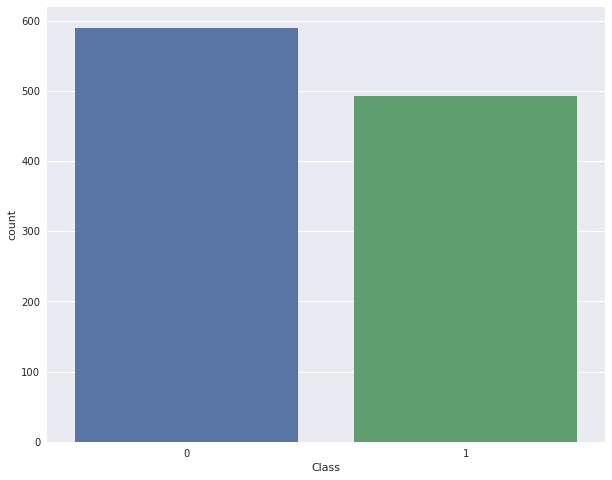

In [108]:
print_balance(df_under)

In [109]:
train_and_print_RF(df_under)

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       205
          1       0.97      0.81      0.88       153

avg / total       0.91      0.91      0.91       358



## Ovesampling

In [110]:
over_sampling_fraud = norm_df[norm_df["Class"] == 1]
over_sampling_legit = norm_df[norm_df["Class"] == 0]

df_fraud= pd.concat([over_sampling_fraud]*480)
df_over = pd.concat([over_sampling_legit, df_fraud])

Number of fraud transactions: 7084800
Number of legitimate transactions: 8529450
Ration of fraud/legitimate transactions = 0.830628000633


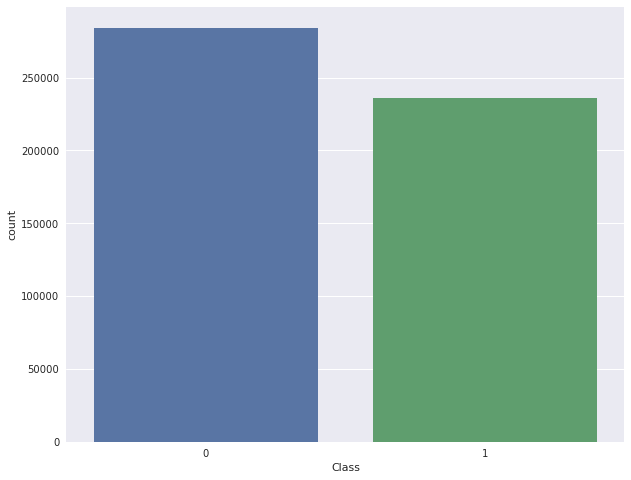

In [111]:
print_balance(df_over)

In [112]:
train_and_print_RF(df_over)

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     93713
          1       0.99      0.85      0.92     78044

avg / total       0.94      0.93      0.93    171757



## Hybrid Approach

In [127]:
hybrid_sampling_fraud = norm_df[norm_df["Class"] == 1]
hybrid_sampling_legit = norm_df[norm_df["Class"] == 0]

fraud_size = hybrid_sampling_fraud.size

df_fraud = pd.concat([hybrid_sampling_fraud]*50)
df_legit = hybrid_sampling_legit.sample(n=fraud_size*2)
df_hybrid = pd.concat([df_legit, df_fraud])

Number of fraud transactions: 738000
Number of legitimate transactions: 885600
Ration of fraud/legitimate transactions = 0.833333333333


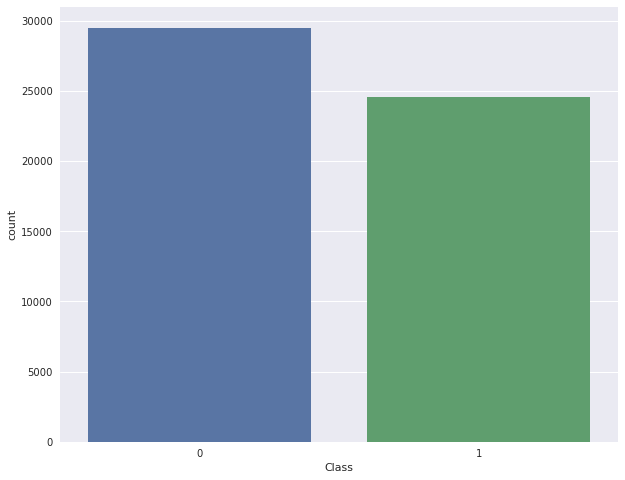

In [128]:
print_balance(df_hybrid)

In [126]:
train_and_print_RF(df_hybrid)

             precision    recall  f1-score   support

          0       0.89      0.99      0.94      9721
          1       0.99      0.87      0.93      9763

avg / total       0.94      0.93      0.93     19484

